<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 20)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2001-01-01 2002-01-01 ... 2020-01-01
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-23 16:07:08 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...


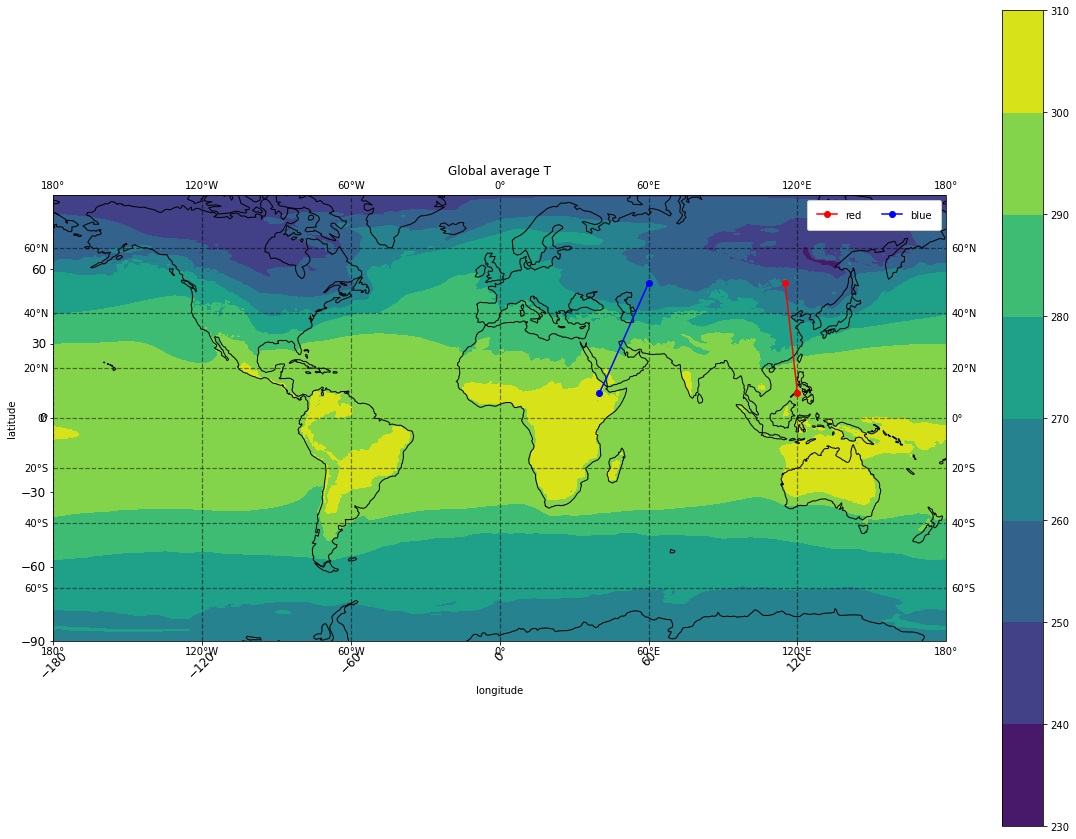

In [56]:
#%% Question 2-1
from numpy.lib.function_base import select
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
ds = xr.open_dataset("F:\GlobalT.nc", engine="netcdf4")
# print(ds)
print(ds)
lon=ds.longitude
# print(lon)
lat=ds.latitude
# time=ds.time
t=ds.t

mean_t=np.mean(t,0)
# print(mean_t)
fig2=plt.figure(figsize=(20,15))#设置一个画板，将其返还给fig
ax = fig2.add_subplot(1, 1, 1, projection=ccrs.Miller())
ax.coastlines()

#add gridlines
gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=1.2,
        color='k',
        alpha=0.5,
        linestyle='--'
    )

X,Y = np.meshgrid(lon,lat)
plt.contourf(X,Y,mean_t)

# add title xlabel ylabel colorbar xticks yticks
plt.title('Global average T')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()
plt.xticks(ticks=np.arange(-180,180,60),fontsize=12,rotation=45,ha='center',va='top')
plt.yticks(ticks=np.arange(-90,90,30),fontsize=12,rotation=0,ha='right',va='center')

# add two points
A = dict(lon=115, lat=50)
B = dict(lon=120, lat=10)
lons = [A['lon'], B['lon']]
lats = [A['lat'], B['lat']]

# add another two points
C = dict(lon1=60, lat1=50)
D = dict(lon1=40, lat1=10)
lons1 = [C['lon1'], D['lon1']]
lats1 = [C['lat1'], D['lat1']]

L1=plt.plot(lons, lats, 'ro-', transform=ccrs.PlateCarree())
L2=plt.plot(lons1, lats1, 'bo-', transform=ccrs.PlateCarree())

# add legend
plt.legend([L1[0],L2[0]],                  # plot items
           ['red', 'blue'],                # legends
           frameon=True,                   # legend border
           framealpha=1,                   # transparency of border
           ncol=2,                         # num of columns
           shadow=False,                   # shadow on
           borderpad=1)                    # thickness of border
           
plt.show()

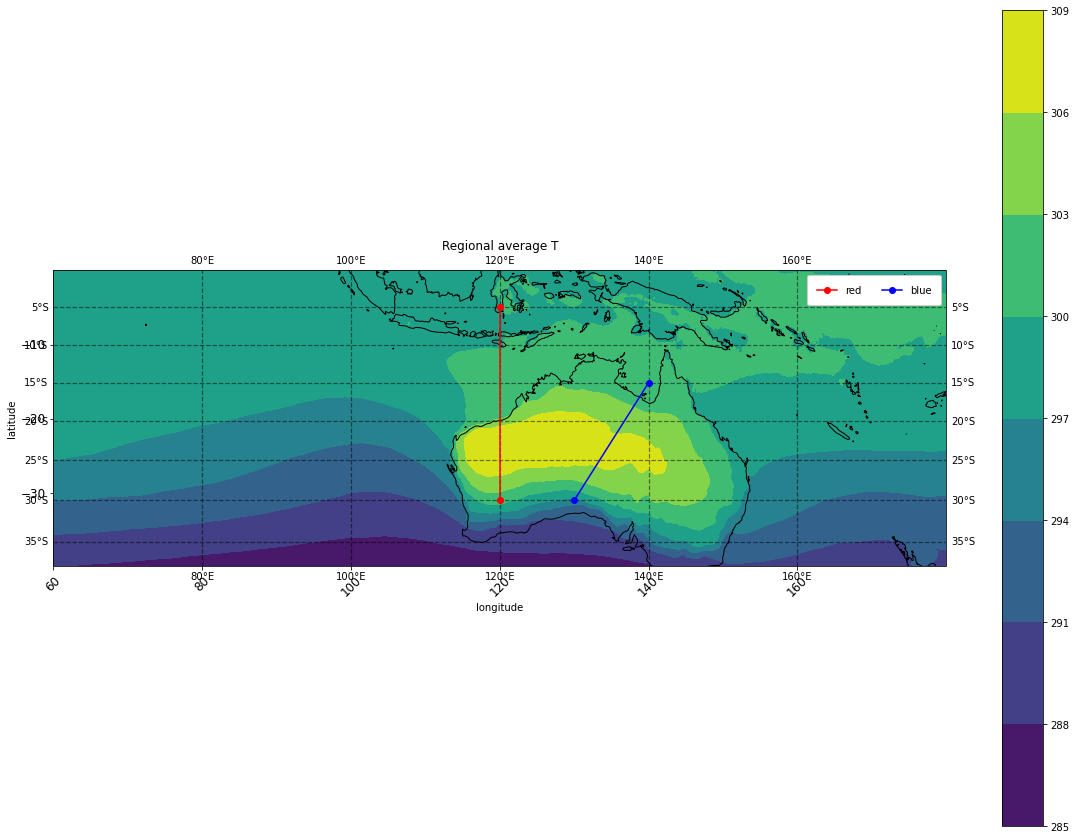

In [57]:
#%% Question 2-2
lonlist=list(lon.values)
latlist=list(lat.values)
# print(lonlist)
# print(latlist.index(0.0))
# print(latlist.index(-40.0))
# print(lon)
sublon=lon[240:721]
# print(lon[240])
# print(sublon)
sublat=lat[360:520]
# print(mean_t.values)
# # tlist=list(mean_t.values)
# print(tlist)
subt=mean_t[360:520,240:721]
# print(subt)

fig3=plt.figure(figsize=(20,15))#设置一个画板，将其返还给fig
ax = fig3.add_subplot(1, 1, 1, projection=ccrs.Miller())
ax.coastlines()

#add gridlines
gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=1.2,
        color='k',
        alpha=0.5,
        linestyle='--'
     )

X,Y = np.meshgrid(sublon,sublat)
plt.contourf(X,Y,subt)

# add title xlabel ylabel colorbar xticks yticks
plt.title('Regional average T')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()

plt.xticks(ticks=np.arange(60,180,20),fontsize=12,rotation=45,ha='center',va='top')
plt.yticks(ticks=np.arange(-40,0,10),fontsize=12,rotation=0,ha='right',va='center')

# add two points
A = dict(lon=120, lat=-30)
B = dict(lon=120, lat=-5)
lons = [A['lon'], B['lon']]
lats = [A['lat'], B['lat']]

# add another two points
C = dict(lon1=130, lat1=-30)
D = dict(lon1=140, lat1=-15)
lons1 = [C['lon1'], D['lon1']]
lats1 = [C['lat1'], D['lat1']]

L1=plt.plot(lons, lats, 'ro-', transform=ccrs.PlateCarree())
L2=plt.plot(lons1, lats1, 'bo-', transform=ccrs.PlateCarree())

# add legend
plt.legend([L1[0],L2[0]],                  # plot items
           ['red', 'blue'],                # legends
           frameon=True,                   # legend border
           framealpha=1,                   # transparency of border
           ncol=2,                         # num of columns
           shadow=False,                   # shadow on
           borderpad=1)                    # thickness of border           
plt.show()

